# Pairwise Difference

In [1]:
import numpy as np
x = np.random.rand(5)  # For random 

In [2]:
print(x)

[0.29078416 0.41381866 0.48056721 0.54688506 0.85438845]


In [7]:
d = x[:, np.newaxis] - x      # Code for calculating a pairwise difference

In [6]:
print(d)

[[ 0.         -0.12303449 -0.18978305 -0.2561009  -0.56360429]
 [ 0.12303449  0.         -0.06674856 -0.13306641 -0.44056979]
 [ 0.18978305  0.06674856  0.         -0.06631785 -0.37382124]
 [ 0.2561009   0.13306641  0.06631785  0.         -0.30750339]
 [ 0.56360429  0.44056979  0.37382124  0.30750339  0.        ]]


# Hausdorff distance

In [11]:
import numpy as np

# Define the sets P and Q as random points
P = np.random.rand(5, 2)
Q = np.random.rand(7, 2)

# Compute the Hausdorff distance between sets P and Q
def hausdorff(P, Q):
    # Initialize the distance to negative infinity
    max_distance = float("-inf")
    
    # Calculate h(P, Q)
    for p in P:
        min_distance = np.min(np.linalg.norm(Q - p, axis=1))
        max_distance = max(max_distance, min_distance)
    
    # Calculate h(Q, P)
    for q in Q:
        min_distance = np.min(np.linalg.norm(P - q, axis=1))
        max_distance = max(max_distance, min_distance)
    
    return max_distance

# Calculate the Hausdorff distance between P and Q
hausdorff_distance_PQ = hausdorff(P, Q)

# Calculate the Hausdorff distance between Q and P
hausdorff_distance_QP = hausdorff(Q, P)

# Calculate the final Hausdorff distance as the maximum of both directions
hausdorff_distance = max(hausdorff_distance_PQ, hausdorff_distance_QP)

print("Hausdorff Distance:", hausdorff_dist)


Hausdorff Distance: 0.4603647956575361


# Graphing Function

In [12]:
import numpy as np
import matplotlib.pyplot as plt


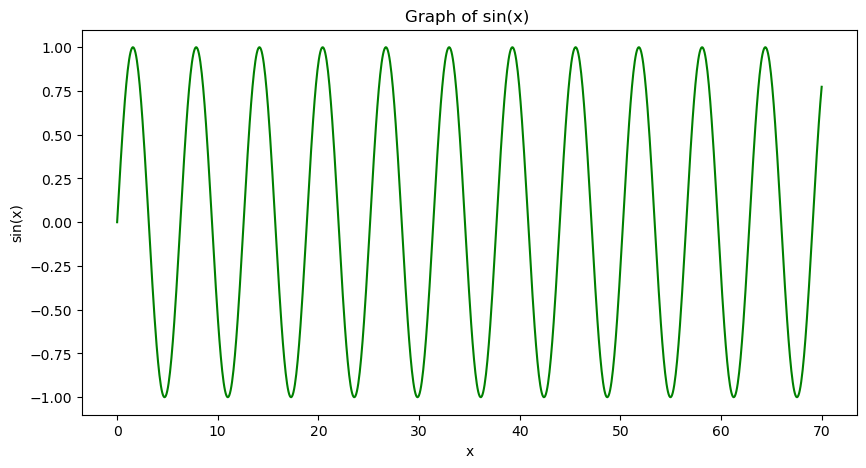

In [17]:
# Graph a function of one variable
p=np.linspace(0,70,1000)
# With the help of p
q=np.sin(p)


# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(p, q, label='sin(x)', color='green')
plt.title('Graph of sin(x) ')
plt.xlabel('x')
plt.ylabel('sin(x)')

plt.show()

# For two Variables

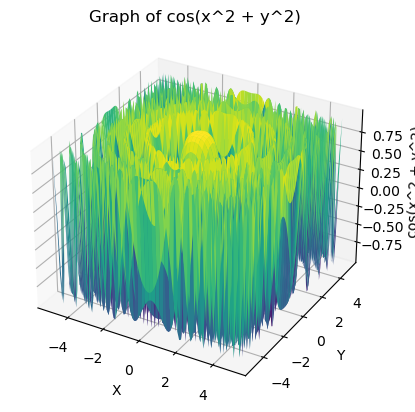

In [21]:

from mpl_toolkits.mplot3d import Axes3D

# Generating the points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Making a grid
X, Y = np.meshgrid(x, y)

# Calculate the function values
P= np.cos(X**2 + Y**2)

# Create a 3D plot
fig= plt.figure()
axes = fig.add_subplot(111, projection='3d')

# Plot the surface
axes.plot_surface(X, Y, P, cmap='viridis')

# Add labels and a title
axes.set_xlabel('X')
axes.set_ylabel('Y')
axes.set_zlabel('cos(x^2 + y^2)')
axes.set_title('Graph of cos(x^2 + y^2)')

# Show the plot
plt.show()


# k Nearest Neighbors

In [26]:
import numpy as np

def k_nearest_neighbors(points, k):
    
    num_points = points.shape[0]
    
    # Calculate pairwise Euclidean distances
    pairwise_distances = np.linalg.norm(points[:, np.newaxis] - points, axis=2)
    
    # Exclude self-distances by setting them to a large value
    np.fill_diagonal(pairwise_distances, np.inf)
    
    # Find the indices of the k nearest neighbors for each point
    k_nearest_indices = np.argpartition(pairwise_distances, k, axis=1)[:, :k]
    
    return k_nearest_indices


# Generate random points
np.random.seed(42)
points = np.random.rand(11, 2)  # 10 random points in the plane

# Find the 3 nearest neighbors for each point
k = 3
k_nearest_neighbors = k_nearest_neighbors(points, k)

# Print the results
print("Indices of the", k, "nearest neighbors for each point:")
print(k_nearest_neighbors)


Indices of the 3 nearest neighbors for each point:
[[ 5  3  4]
 [ 4  6  9]
 [ 9  7  8]
 [ 5  0  8]
 [ 8  1  0]
 [ 0  3  8]
 [ 1 10  9]
 [ 2  9  8]
 [ 4  9  7]
 [10  8  7]
 [ 7  6  9]]


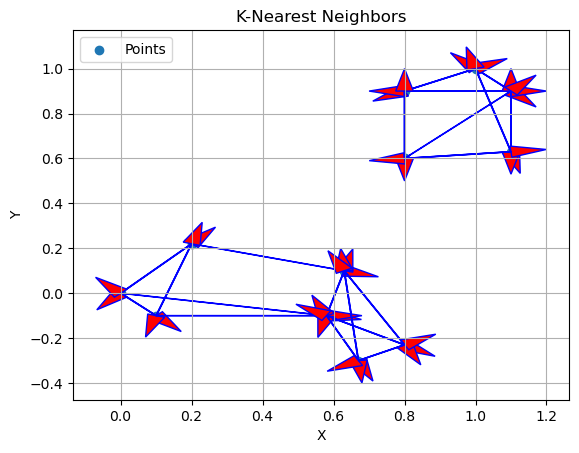

In [33]:
import numpy as np
import matplotlib.pyplot as plt



# Define the set of points P
P = np.array([[0, 0], [0.2, 0.22], [0.1, -0.1], [1, 1], [1.1, 0.9], [0.8, 0.9], [1.1, 0.63],
              [0.58, -0.1], [0.63, 0.1], [0.67, -0.3], [0.8, -0.23], [0.8, 0.6]])

# Define the value of k
k = 3

# Find the k nearest neighbors for each point in P
k_nearest_indices = k_nearest_neighbors(P, k)

# Plot the points
plt.scatter(P[:, 0], P[:, 1], marker='o', label='Points')

# Plot arrows from each point to its k-nearest neighbors
for i, neighbors_indices in enumerate(k_nearest_indices):
    for neighbor_index in neighbors_indices:
        plt.arrow(P[i, 0], P[i, 1], P[neighbor_index, 0] - P[i, 0], P[neighbor_index, 1] - P[i, 1],
                  head_width=0.05, head_length=0.1, fc='red', ec='blue')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Nearest Neighbors')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
